In [2]:
'''
Objective: 
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets
Dataset:
Need to Classify the animal type
Tasks:
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.

Interview Questions:
1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?
'''

"\nObjective: \nThe objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets\nDataset:\nNeed to Classify the animal type\nTasks:\n1. Analyse the data using the visualizations\n2. Preprocess the data by handling missing values & Outliers, if any.\n3. Split the dataset into training and testing sets (80% training, 20% testing).\n4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset\n5. Choose an appropriate distance metric and value for K.\n6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.\n7. Visualize the decision boundaries of the classifier.\n\nInterview Questions:\n1. What are the key hyperparameters in KNN?\n2. What distance metrics can be used in KNN?\n"

In [3]:
import pandas as pd
df = pd.read_csv("C:\\Users\\sujey\\Downloads\\Assignments\\KNN\\KNN\\Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


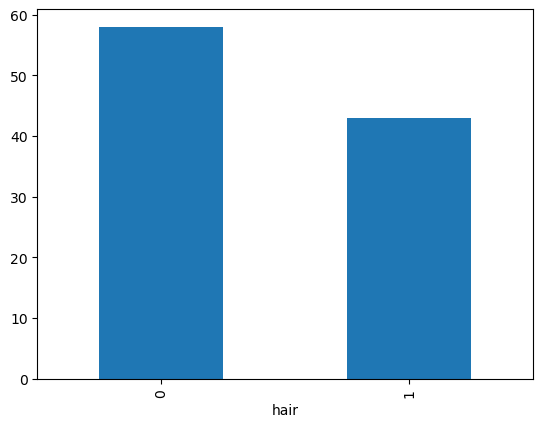

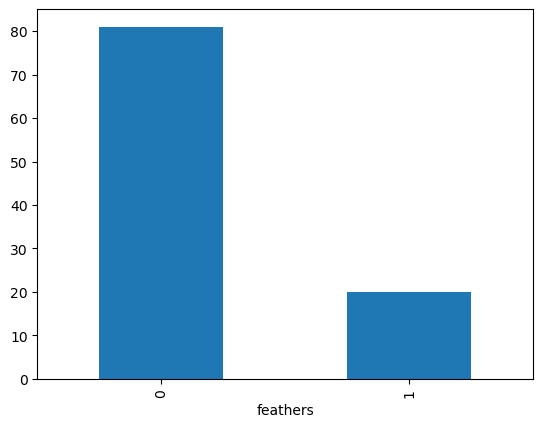

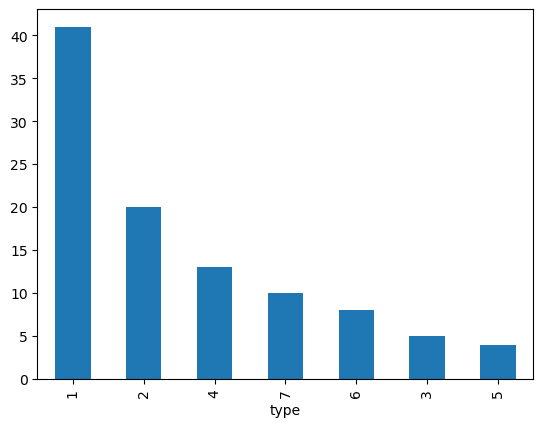

In [7]:
#visualizations
import matplotlib.pyplot as plt
df["hair"].value_counts().plot(kind="bar")
plt.show()

df["feathers"].value_counts().plot(kind="bar")
plt.show()

df["type"].value_counts().plot(kind="bar")
plt.show()

In [8]:
#Preprocess the data by handling missing values & Outliers, if any.
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [11]:
X = df.drop(["animal name","type"],axis=1)
Y = df["type"]

In [68]:
#Split the dataset into training and testing sets (80% training, 20% testing).
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 100,test_size = 0.2,stratify=Y)

In [69]:
#Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [70]:
Y_pred_test = model.predict(X_test)

In [71]:
#Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
#calculate metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
test_score = accuracy_score(Y_test,Y_pred_test)
prec_score = precision_score(Y_test,Y_pred_test,average='micro')
recall = recall_score(Y_test,Y_pred_test,average='micro')
f1 = f1_score(Y_test,Y_pred_test,average='micro')
print("Testing accuracy:",round(test_score,2))
print("Precision score:",round(prec_score,2))
print("Recall score:",round(recall,2))
print("F1 score:",round(f1,2))

Testing accuracy: 0.9
Precision score: 0.9
Recall score: 0.9
F1 score: 0.9


In [72]:
#Cross validation
import numpy as np
training_acc = []
test_acc = []

for i in range(1,11):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size=0.2,random_state=i, stratify=Y)
    model.fit(X_train,Y_train)
    y_pred_test = model.predict(X_test)
    test_acc.append(accuracy_score(Y_test,y_pred_test))

print("KNN-Cross validation-Test accuracy:",np.round(np.mean(test_acc),2))

KNN-Cross validation-Test accuracy: 0.85


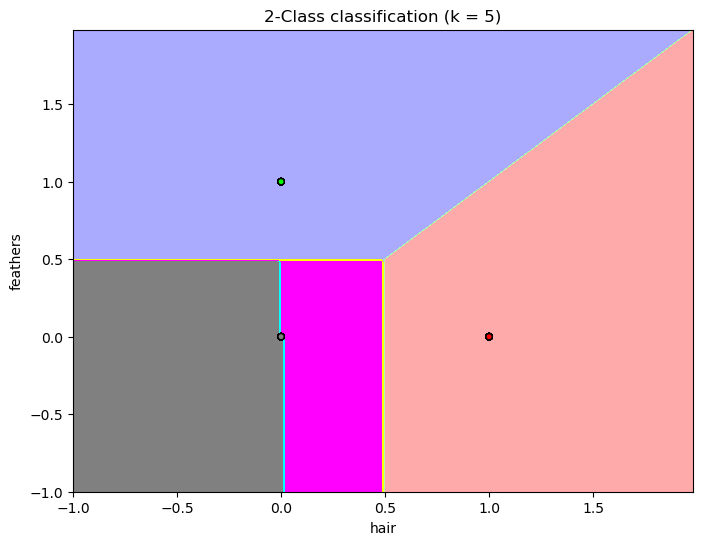

In [74]:
# Visualize the decision boundaries of the classifier.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Select two features for visualization (e.g., 'hair' and 'feathers')
X_2d = X[['hair', 'feathers']].values
Y_2d = Y.values

# Create a meshgrid
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Train a KNeighborsClassifier on the 2D data
model_2d = KNeighborsClassifier(n_neighbors=5)
model_2d.fit(X_2d, Y_2d)

# Predict the class for each point in the meshgrid
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a colormap for the classes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFF00', '#FF00FF', '#00FFFF', '#808080'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#808080'])

# Plot the decision boundary and the data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=Y_2d, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = 5)")
plt.xlabel('hair')
plt.ylabel('feathers')
plt.show()

In [ ]:
#1. What are the key hyperparameters in KNN?
#  n_neigbors: This is perhaps the most crucial hyperparameter. It determines how many of the nearest data points are considered when classifying a 
#              new data point.
#  Distance Metric: The distance metric defines how the algorithm calculates the distance between data points
#  Weights: The weights parameter determines how much influence each neighbor has on the final prediction.
2. What distance metrics can be used in KNN?
# Distance metrics include Euclidean distance, Manhattan distance, and Minkowski distance